# Machine Learning 라이브러리

In [11]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
x_iris, y_iris = iris.data, iris.target

print(x_iris.shape, y_iris.shape)
print(x_iris[0], y_iris[0])
x_iris[:5]

(150, 4) (150,)
[5.1 3.5 1.4 0.2] 0


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x,y = x_iris[:, :2], y_iris

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=33)

print(x_train.shape, y_train.shape)

scaler = preprocessing.StandardScaler().fit(x_train)
scaler

(112, 2) (112,)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
player = 'Roger Federer'
filename = "data/{name}.csv".format(name=player.replace(' ','-'))
df = pd.read_csv(filename,parse_dates=['start date'],dayfirst=True)

In [25]:
df.columns

Index(['year', 'tournament', 'start date', 'type', 'surface', 'draw',
       'atp points', 'atp ranking', 'tournament prize money', 'round',
       'opponent', 'ranking', 'score', 'stats link', 'tournament.1',
       'tournament round', 'time', 'winner', 'player1 name',
       'player1 nationality', 'player1 aces', 'player1 double faults',
       'player1 1st serves in', 'player1 1st serves total',
       'player1 1st serve points won', 'player1 1st serve points total',
       'player1 2nd serve points won', 'player1 2nd serve points total',
       'player1 break points won', 'player1 break points total',
       'player1 service games played', 'player1 1st serve return points won',
       'player1 1st serve return points total',
       'player1 2nd serve return points won',
       'player1 2nd serve return points total',
       'player1 break points converted won',
       'player1 break points converted total', 'player1 return games played',
       'player1 total service points won',
 

Roger Federer has won 82% of his ATP matches.


Text(0, 0.5, 'Proportion of double faults per match.')

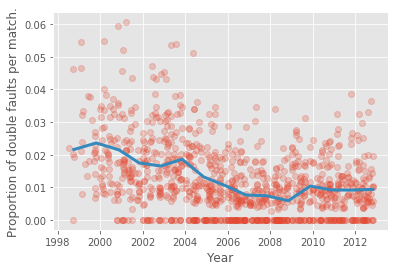

In [26]:
df['win'] = df['winner'] == player
print(("{player} has won {vic:.0f}% "
       "of his ATP matches.").format(player=player, vic=100*df['win'].mean()))

date = pd.to_datetime(df['start date'])

df['dblfaults'] = (df['player1 double faults']/df['player1 total points total'])
df['dblfaults'].tail()
df['dblfaults'].describe()

df.groupby('surface')['win'].mean()
gb = df.groupby('year')

plt.style.use('ggplot')

plt.plot_date(date, df['dblfaults'],alpha=.25,lw=0)
plt.plot_date(gb['start date'].max(), gb['dblfaults'].mean(),'-',lw=3)

plt.xlabel('Year')
plt.ylabel('Proportion of double faults per match.')

In [35]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

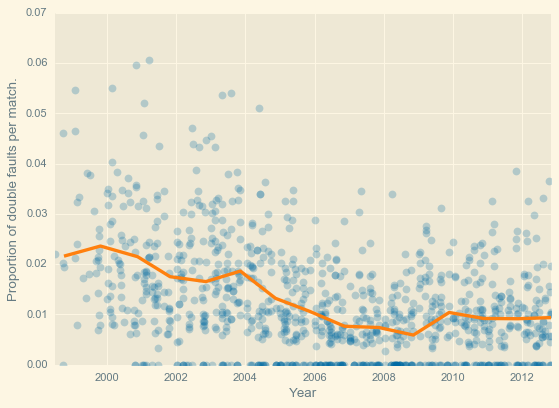

In [43]:
plt.plot_date(date, df['dblfaults'],alpha=.25,lw=0)
plt.plot_date(gb['start date'].max(), gb['dblfaults'].mean(),'-',lw=3)

plt.xlabel('Year')
plt.ylabel('Proportion of double faults per match.')

plt.style.use('tableau-colorblind10')
    

    

##  z-test

In [45]:
import numpy as np
import scipy.stats as st
import scipy.special as sp

n = 100
h = 61
q = .5

xbar = float(h)/n

z = (xbar -q) * np.sqrt(n / (q*(1-q)))
z


2.1999999999999997

In [47]:
pval = 2*(1-st.norm.cdf(z))
pval

0.02780689502699718

## Bayesian method

(0, 9.238743259089906)

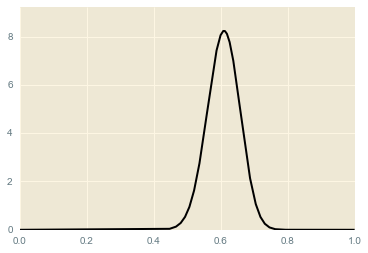

In [51]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

%matplotlib inline

posterior = lambda n, h, q: ((n+1) * st.binom(n,q).pmf(h))

n=100
h=61
q = np.linspace(0., 1., 1000)
d = posterior(n,h,q)
plt.plot(q,d,'-k')
plt.ylim(0, d.max(0)+1)

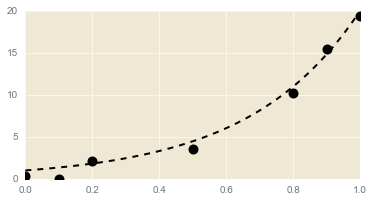

In [69]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pylab as plt

%matplotlib inline

f = lambda x: np.exp(3*x)
x_tr = np.linspace(0.,2,200)
y_tr = f(x_tr)

#plt.plot(x_tr, y_tr)

x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + np.random.randn(len(x))

plt.figure(figsize=(6,3))
plt.plot(x_tr[:100], y_tr[:100], '--k')
plt.plot(x,y, 'ok', ms=10)

Text(0.5, 1.0, 'Linear regression')

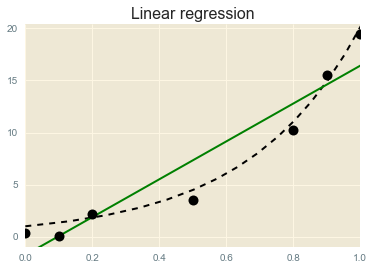

In [73]:
lr = lm.LinearRegression()
lr.fit(x[:, np.newaxis], y)
y_lr = lr.predict(x_tr[:, np.newaxis])
plt.plot(x_tr, y_tr, '--k')
plt.plot(x_tr, y_lr, 'g')
plt.plot(x,y,'ok', ms=10)
plt.xlim(0,1)
plt.ylim(y.min()-1, y.max()+1)
plt.title("Linear regression")

#### 방데르몬드(numpy에 들어가 있음)

In [77]:
for i,j in zip([2,5], ['-','.']):
    print(i,j)

2 -
5 .


24.67 -6.49 0.00
26.32 -14.81 8.18 0.00
-533.30 1315.57 -1081.28 344.64 -26.50 0.00


Text(0.5, 1.0, 'Linear regression')

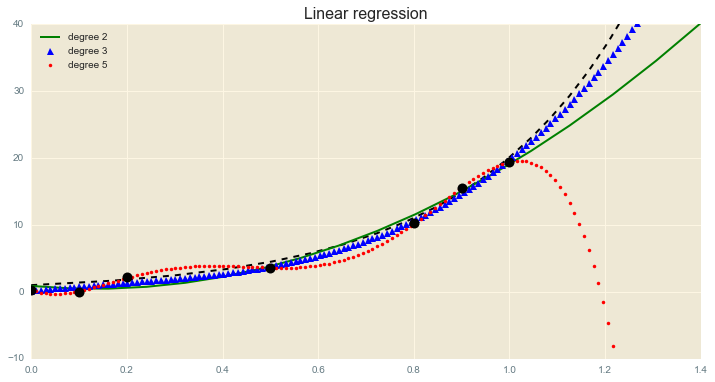

In [84]:
lrp = lm.LinearRegression()
plt.figure(figsize=(12,6))
plt.plot(x_tr, y_tr, '--k')
for deg, s in zip([2,3, 5], ['g-', 'b^', 'r.']):
    lrp.fit(np.vander(x, deg+1), y)
    y_lrp = lrp.predict(np.vander(x_tr, deg+1))
    plt.plot(x_tr, y_lrp, s, label='degree '+str(deg))
    plt.legend(loc=2)
    plt.xlim(0, 1.4)
    plt.ylim(-10, 40)
    
    print(' '.join(['%.2f' % c for c in lrp.coef_]))
plt.plot(x,y, 'ok', ms=10)
plt.title("Linear regression")


-533.30 1315.57 -1081.28 344.64 -26.50 0.00
-533.30 1315.57 -1081.28 344.64 -26.50 0.00
-533.30 1315.57 -1081.28 344.64 -26.50 0.00


Text(0.5, 1.0, 'Ridge regression')

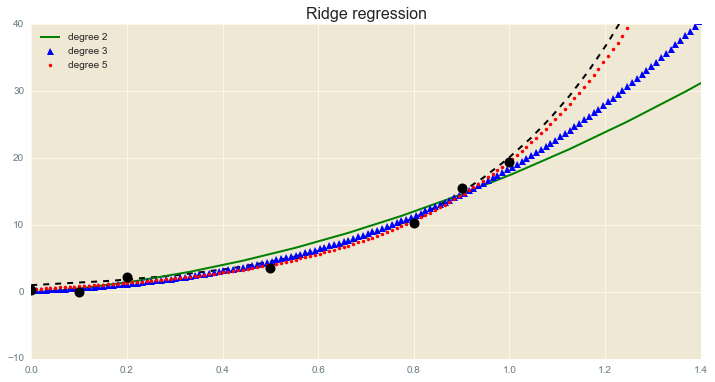

In [89]:
ridge = lm.RidgeCV()
plt.figure(figsize=(12,6))
plt.plot(x_tr, y_tr, '--k')

for deg , s in zip([2,3,5], ['g-','b^', 'r.' ]):
    ridge.fit(np.vander(x, deg+1), y)
    y_ridge = ridge.predict(np.vander(x_tr, deg+1))
    plt.plot(x_tr, y_ridge, s, label='degree '+str(deg))
    plt.legend(loc=2)
    plt.xlim(0, 1.4)
    plt.ylim(-10, 40)
    
    print(' '.join(['%.2f' % c for c in lrp.coef_]))
plt.plot(x,y, 'ok', ms=10)
plt.title("Ridge regression")


In [93]:
from sklearn.datasets import load_boston
boston = load_boston()
dfx_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy_boston = pd.DataFrame(boston.target, columns=['MEDV'])
df_boston0 = pd.concat([dfx_boston, dfy_boston], axis=1)
df_boston0.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [94]:
import seaborn as sns
df_boston0.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


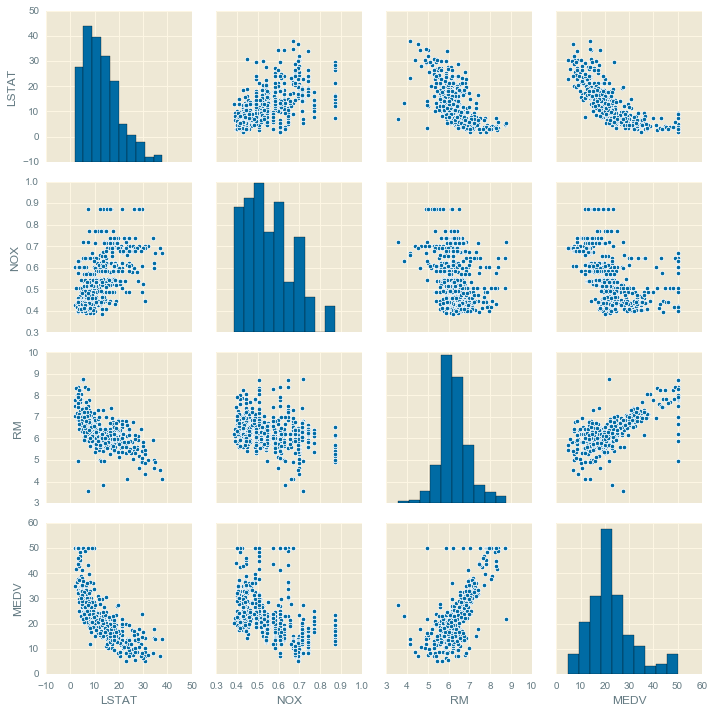

In [95]:
cols = ['LSTAT', 'NOX', 'RM', 'MEDV']
sns.pairplot(df_boston0[cols])
plt.show()

In [96]:
from sklearn import datasets
import numpy as np
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [97]:
housing = datasets.fetch_california_housing()


In [98]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [99]:
x, y = boston.data, boston.target

In [109]:
datasets.make_circles??

In [122]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [125]:
pd.DataFrame(boston.data, columns=['RM'])

ValueError: Shape of passed values is (506, 13), indices imply (506, 1)

Coefficients: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Mean squared error: 21.894831181729206


Text(0, 0.5, 'house price')

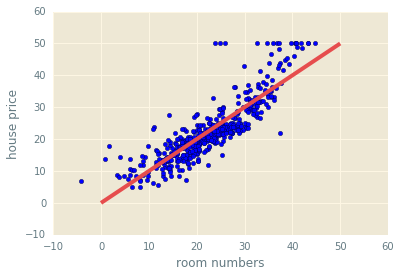

In [137]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import matplotlib
from sklearn.metrics import mean_squared_error

boston = load_boston()
x = boston.data
y = boston.target

lr = LinearRegression()
lr.fit(x,y)

boston_pred = lr.predict(x)

print('Coefficients: {0}'.format(lr.coef_))
mse = mean_squared_error(y, boston_pred)
print("Mean squared error: {0}".format(mse))
fig,ax = plt.subplots()
ax.plot([0,50],[0,50], '-', color=(.9,.3,.3), lw=4)


ax.scatter(lr.predict(x), boston.target)
matplotlib.rc('font', family='NanumBarunGothic')
ax.set_xlabel('room numbers')
ax.set_ylabel('house price')


In [141]:
import tensorflow as tf

state = tf.Variable(0, name="counter")

one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state, new_value)

init_op = tf.initialize_all_variables()
with tf.Session() as sess:
    sess.run(init_op)
    print(sess.run(state))
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))
        

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'init' type=NoOp>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "c:\python36\lib\site-packages\IPython\core\interactiveshell.py", line 3316, in run_code
    return outflag  File "<ipython-input-140-23aaef5723a3>", line 9, in <module>
    init_op = tf.initialize_all_variables()  File "c:\python36\lib\site-packages\tensorflow\python\util\tf_should_use.py", line 193, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))
0
1
2
3


In [144]:
import tensorflow as tf

state = tf.Variable(0, name="counter")

one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state, new_value)

init_op = tf.initialize_all_variables()
with tf.Session() as sess:
    sess.run(init_op)
    print(sess.run(state))
    for _ in range(3):
        sess.run(update)
        print(sess.run(update))

0
2
4
6


# New Paragraph
### *Itelic*
### **bold**
### ***Itelic+bold***
[link](http://this.is.link)

equations:
$$
\hat{f}(x) = \int_{-\infty}^{+\infty} f(x)\, \mathrm{e}^{-i \xi x}dx
$$

code with syntax highlighting:
```python
print("hello world !! ")
```

images:
![This is an image](http://ipython.org/_static/IPy_header.png)

notebook 셀을 파일로 저장할때 
%%writefile "파일명.py"


In [171]:
%%writefile egos.py
import sys
import os
folder = ""
if len(sys.argv) > 1:
    folder = sys.argv[1]
    
files = os.listdir(folder)
files

Overwriting egos.py


In [159]:
!mkdir fbdata

In [164]:
%pwd

'C:\\dk'

In [167]:
%bookmark fbdata

In [170]:
%run -i egos.py csv

['ex1.csv', 'ex2.csv', 'ex3.csv', 'ex4.csv', 'ex5.csv', 'ex6.csv', 'ex7.csv', 'Haiti.csv']


In [173]:
files

['ex1.csv',
 'ex2.csv',
 'ex3.csv',
 'ex4.csv',
 'ex5.csv',
 'ex6.csv',
 'ex7.csv',
 'Haiti.csv']

In [174]:
%bookmark -l

Current bookmarks:
fbdata -> C:\dk


In [175]:
%cd fbdata
%pwd

C:\dk\fbdata


'C:\\dk\\fbdata'